# Labolatorium 4 

Zadanie
Zaimplementuj konwolucyjną sieć neuronową do klasyfikacji obrazów cyfr z zestawu MNIST,
używając architektury przedstawionej na schemacie:
- dwie warstwy konwolucyjne (24 filtry 3x3 i 36 filtrów 3x3) przeplatane warstwami
max-pooling (2x2),
- warstwa spłaszczająca,
- dwie w pełni połączone warstwy (900 i 128 neuronów)
- warstwa wyjściowa z 10 neuronami.
Skompiluj model z optymalizatorem Adam, a następnie wytrenuj go na zbiorze treningowym przez
10 epok z walidacją. Oceń dokładność na zbiorze testowy.


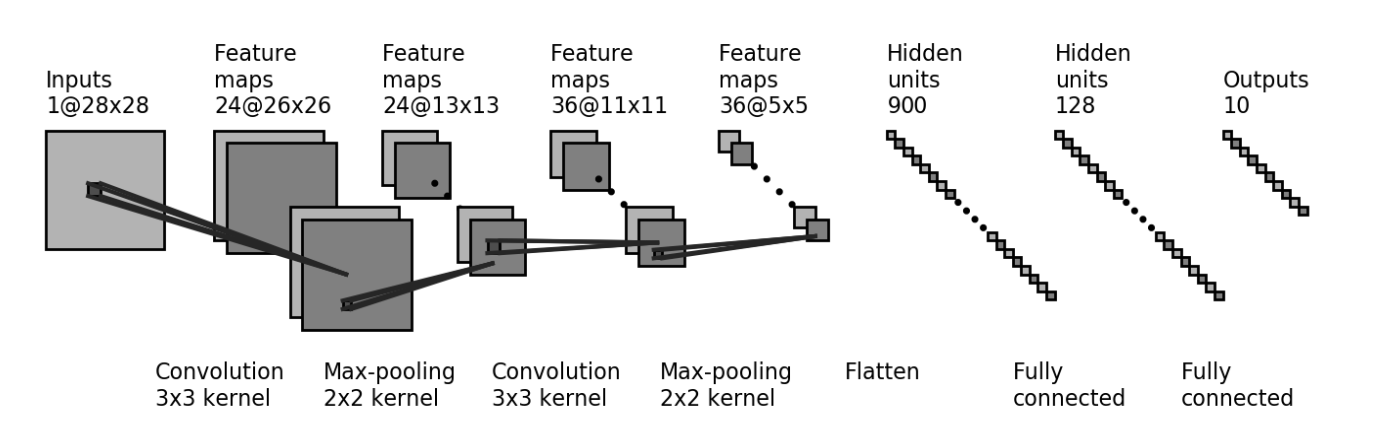


Protips:
- Zbiór MNIST znajduje się w bibliotece tensorflow mnist = tf.keras.datasets.mnist;
- Przygotuj dane przed budową sieci (przekształcanie na wektory, normalizacja oraz
kodowane etykiet);
- Do budowy modelu użyj metod z TensorFlow (tf.keras.layers.Conv2D,
tf.keras.layers.MaxPool2D, tf.keras.layers.Flatten, tf.keras.layers.Dense). Użyj funkcji
aktywacyjnych ReLU, a dla warstwy wyjściowej softmax;
- Użyj metody compile do kompilacji modelu, zdefiniuj funkcje straty, metrykę i
optymalizator (np. Adam);
- Zdefiniuj batch_size, validation_split, liczbę epok oraz rozmiar zbioru ewaluacyjnego
w metodzie fit;
- Użyj metody evaluate do oceny dokładności;


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

path = "/Users/krzysztofbabicki/Documents/Edukacja/WSEI/WSEI - Semestr I/Zaawansowane metody sztucznej inteligencji/Laby/Lab4/mnist.npz"
with np.load(path) as data:
    x_train, y_train = data['x_train'], data['y_train']
    x_test, y_test = data['x_test'], data['y_test']

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Dodanie wymiaru kanału dla danych wejściowych (28x28 -> 28x28x1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential([
    layers.Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(36, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(900, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Dokładność na zbiorze testowym: {test_accuracy:.2f}")


Epoch 1/10


/Users/krzysztofbabicki/Documents/Edukacja/WSEI/WSEI - Semestr I/Zaawansowane metody sztucznej inteligencji/Laby/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8792 - loss: 0.3864 - val_accuracy: 0.9823 - val_loss: 0.0606
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9851 - loss: 0.0469 - val_accuracy: 0.9843 - val_loss: 0.0525
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9800 - val_loss: 0.0702
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 0.9892 - val_loss: 0.0397
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9958 - loss: 0.0145 - val_accuracy: 0.9887 - val_loss: 0.0410
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9865 - val_loss: 0.0497
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9970 - loss: 0.0102 - val_accuracy: 0.9852 - val_loss: 0.0600
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9968 - loss: 0.0106 - val_accuracy: 0.9882 - val_